<a href="https://colab.research.google.com/github/heejjj/Image_Processing_Kor_Univ/blob/Kor_Univ/ISR_0603_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import time
import random
import glob
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [22]:
import torch
import torch.nn as nn
import torch.autograd as autograd
from torch.autograd import Variable
import torch.optim as optim
import numpy as np
import nibabel as nib

#Install scikit-image
 -[refer] https://yunwoong.tistory.com/48

In [8]:
! pip install scikit-image
#https://scikit-image.org/docs/stable/user_guide/install.html#installation-via-pip-and-conda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import skimage
from skimage import io

In [15]:
from skimage import data, io, filters

#full requrirements
meson-python>=0.13
wheel
setuptools>=67
packaging>=21
ninja
Cython>=0.29.32
pythran
numpy>=1.21.1

- Developer UI
spin==0.3
-build

In [19]:
skimage.__version__

'0.19.3'

In [23]:
#https://scikit-image.org/docs/stable/api/skimage.measure.html

#from skimage.measure import compare_psnr, compare_ssim, compare_nrmse  -> removed in 0.18 ver
from skimage.metrics import peak_signal_noise_ratio

#preprocessing.py 

In [26]:
#py파일 불러오기

from google.colab import files
src = list(files.upload().values())[0]
open('preprocessing.py','wb').write(src)
import preprocessing

Saving preprocessing.py to preprocessing (1).py


In [29]:
#.py파일안에서 함수 불러오기

#파일이름.함수이름
preprocessing.patch_test_img, merge_test_img

(<function preprocessing.patch_test_img(img, size=32)>,
 <function preprocessing.merge_test_img(patchs, row, col, size=32)>)

In [ ]:
#from preprocessing import patch_test_img, merge_test_img
#from data import *

Pix2Pix에서 최적화를 위한 objective funtion 설계 시, cGAN loss뿐만 아니라, L1 reconstruction loss를 함께 고려해 줘야, 보다 선명한 이미지 생성이 가능. 
G(Generator)는 전체 맥락 및 복원을 위해 encoder-decoder형태를 취하나, 영상 복원시, 선명한 화질을 얻지 못해 U-Net 구조를 취함. 

# PatchGAN 기반의 Discriminator
 - http://cs231n.stanford.edu/reports/2017/pdfs/403.pdf

 - 서로 겹치는 patch로 나눠, patch들에 대해 진짜/가짜를 구별하는 방식으로 Discrimitor의 최적화 목표 함수를 정함. 
 - 전체 이미지에 대해 진짜/가짜를 가리는 것보다는 correlation관계가 유지돠는 범위에 해당하는
적절한 크기의 patch를 정하고, 그 patch들이 대부분 진짜인 쪽으로 결과가 나오도록 학습하는게 효율적 



[최적화 목표함수] 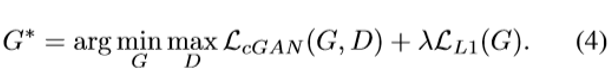

Discriminator에서 사용한 PatchGAN에서는 U-NEt구조를 취하고 있음. 

- 전형적인 U자형 형태가 아닌, encoder과 decoder를 나란히 배치하고, 중간의 skip connection이 직관적으로 잘 드러나게 함. 


전체 이미지에 대해 진짜/가짜를 가리는 것보다는 correlation관계가 유지돠는 범위에 해당하는
적절한 크기의 patch를 정하고, 그 patch들이 대부분 진짜인 쪽으로 결과가 나오도록 학습하는게 효율적 


![image.png](
WD3do8Q7cA8yU+iNKTeIklVOYEFAPnKY4seKz4DVnzFhNaIBDS3ii3SaTyVQQGXibTCaTaYcpFrxvueUWH1Emckw0m8olWEzWrFnjI8+UEgRmAWGgO3i4EbC9PcAN1NNRkmj2lClTPIADz7wv73f88cf7SPgLL7zgfd7UEqemOP7vWAHrNOthLLEVVLZnbCaTqegq/janzb+bTCaTybRdIpZDq3RK9VGdBMjmb+pzswCxlAHE6kGDGWwb2DeIcgPdAWq3F2wBb6LVgD/RbfzYRNGJfGN3oRJJ9erV/XixulCvG1sLj8W+N6AebDIG3SaTaXtlHm+TyWQy7RSFG6pEjUmcBHyJalOH+9JLL1Xv3r29tYQGOvilCyreh8okNMbhfai7TRIliZHYR4isU0WFx7GJMBmg/fxvv/3myxWykGAJfMc21TGZTKYdLQNvk8lkMu1UAdXYTbp27eq91Oeee6569uzpbSbBWrI9IopOaUI6Xn788cf64osvvLecbphAN6BNpBs/ebt27XxU+7PPPvPVSXh/mvHQ+KZixYpbanqbTCbTzpBZTUwmk8m0w0T0majz7Nmzffk97BlNmjTxyZV9+/bVCSec4ME32DbyI6LRwW8dWy8b6wiwTYUUYBqbC1F22snjKx85cqR/HXW3W7Vq5Tti0m2SSDsRcQAd+MZ+gq3EZDKZdpYMvE0mk8m0wxQ83kSgSaQ87rjj1K9fPx/hxsddkAYz+LVD1JpINqIBDvCOP/
\
ubb77xSZRYWPCMYykZMmSIr6JCsiTdJ7GiAOJAOpMCPOYs+LrxgGODKcjYTCaTKT+yqiYmk8lk2mEKEW8AGSimw2O1atW2JE7mR/i0Fy1a5CPZtHgnwZFKJeXLl/cVSFq2bLkliZMGO5QKxLdNNJukSDzkRLI///xzb0HBA85YAG6sJUA3cM5iCZMmk2lXyMDbZDKZTDtURJexdhCRBoDzYyvhksS62EqCJYQoNdHqSpUq+SolwHaFChXUvXt3/17vv/++LxdYs2ZNH70GwrGzYCUh4g2s04p+1apV/nUkU4Za4Xi6LdJtMpl2lex/G5PJZDLtUAHbWEGIJPN7QaLJADGVRqjBTeScOt9EufFpkzBJaULsJwA55QmpxU35QPzaVEoBvOk0iecb+KZkIaBOvW683IwLGXSbTKZdKfsfx2QymUw7VIB2Qa0b4XUkOVatWtWXBMQzDmTzHMBMVBwfN0COhYXqKMA1pQKJYmMpwV8+fvx4bz3hMZ4H0ImIY1kp6PhMJpNpe2TJlSaTyWQqVAKsiUQTMQewsZcA0CRZTpw40Xu+sZ8A5NhKiIAD4FQymTt3rk/CpJoJ0XAqquDrjrW7GHSbTKZ/S+bxNplMJlOhFMmV+LPxcL/66qtq3ry593nj68aKQgt4YBzPNgmTS5cu9U1wEI16sJcQMTeZTKbCIgNvk8lkMhVKcXkiOj1mzBg98MAD3m7Sv39/X6KQ5/B1v/baa76UII9RspDodlBohmM+bpPJVFhk4G0ymUymQikuTyxULKFk4CuvvOITLHv16uU921hLiIizYCWpXbv2lgg3wG7AbTKZCpvsfyWTyWQyFUoBzyyUAGzRooXq1avnq5mQOIkNhWRKqpfst99+vlIJPm8AnMWg22QyFUbZ/0wmk8lkKtQCoikTSElBkimpZkK0m2h4KF1IpDuUCDSZTKbCKrOamEwmk6nQC782lhJqcxcvXtxXKwHCTSaTaXeSgbfJZDKZdhvRjh4Ix2aCpcRkMpl2Jxl4m0wmk8lkMplMO13S/wOXlHdKMKdN+gAAAABJRU5ErkJggg==)

In [ ]:
path = 

In [3]:
# create folders to save result images and trained models

save_dir = "samples"
checkpoint_dir = "models"

#track image as per index
save_ind= 16

if not os.path.exists(save_dir):
    os.makedirs(save_dir)
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

In [5]:
def load(path,shape):
    img= cv2.imread(path)
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img= cv2.resize(img, shape)
    return img

In [6]:
def get_data(path):
    X=[]
    Y=[]
    for folder in glob.glob(path+ str('/*')):
        for img_path in glob.glob(folder+ str('/*')):      
            if folder == os.path.join(path, 'HR'):
                X.append(load(img_path, (384, 384)))
            elif folder == os.path.join(path, 'LR'):
                Y.append(load(img_path, (96,96)))

    X= np.array(X)
    Y= np.array(Y)
    return X/255.0, Y/255.0

In [4]:
###====================== HYPER-PARAMETERS ===========================###
## Adam
batch_size = 5  
lr_v = 2e-4
tot_sample= 100  # Totall traning images
## adversarial learning (SRGAN)
n_epoch = 500
## initialize G
n_epoch_init = n_epoch//10